In [69]:
import xarray as xr

pt = "C:/Users/user/Desktop/Aaroksh/HadlSST/HadISST_sst.nc"
ds = xr.open_dataset(pt)
ds

<xarray.Dataset>
Dimensions:    (time: 1868, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2025-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    6/10/2025 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [116]:
import numpy as np
import random
SST = ds["sst"]
np.random.seed(42)                                                 # DOING THIS WILL NOT CHANGE THE OUTCOMES GENERATED
regional_sst = SST.sel(latitude=slice(5,-5), longitude=slice(-170,-120))    # SELECTING THE LAT , LONG OF NINO 3.4 AREA 
areal_mean = regional_sst.mean(dim = ['latitude','longitude'])              # CALCULATING THE AREAL MEAN   

times = areal_mean.sizes['time']                                            # CALCULATING THE SIZE OF TIME STEPS
print('The total no of time steps is',times)
a =1000
num_data = np.zeros([a,1])         #Creating an array using np.zeros 
for i in range(a):
    rand_steps = np.random.choice(areal_mean,360,replace=False)             # PICKING UP RANDOM 360 NON REPEATING STEPS OUT OF TOTAL 1868 STEPS
    num_data[i] = np.mean(rand_steps)                                       # STORING THESE VALUES INTO THE ALREADY CREATED EMPTY ARRAY
   
print(num_data)                           
    
                              
    
    


The total no of time steps is 1868
[[26.92771339]
 [27.01779175]
 [26.89641571]
 [26.9800148 ]
 [26.91564178]
 [26.96912956]
 [26.87599754]
 [26.95723152]
 [26.93637657]
 [26.97532845]
 [26.94895744]
 [26.9576664 ]
 [26.96571732]
 [26.95825195]
 [26.92118263]
 [26.9200325 ]
 [26.88901901]
 [26.95154953]
 [26.96037292]
 [26.87056732]
 [26.91941643]
 [26.97183418]
 [26.89142227]
 [26.929842  ]
 [26.93656158]
 [26.99280357]
 [26.99769402]
 [26.87460327]
 [27.00704193]
 [26.88714981]
 [26.98797226]
 [26.91181183]
 [26.99176407]
 [26.95124245]
 [26.9133091 ]
 [26.99916458]
 [26.90837669]
 [26.90216255]
 [26.95340347]
 [27.01827812]
 [26.90244102]
 [26.90486908]
 [26.93165779]
 [26.91933632]
 [26.97871017]
 [26.97779465]
 [26.9712677 ]
 [26.90144348]
 [26.91669464]
 [26.98950768]
 [26.95250702]
 [26.91965103]
 [26.88360977]
 [26.90148735]
 [26.93626022]
 [26.86970139]
 [26.94680405]
 [26.98148918]
 [26.98435402]
 [26.94565392]
 [26.97055626]
 [26.97468567]
 [26.96427345]
 [26.90218163]
 [26.

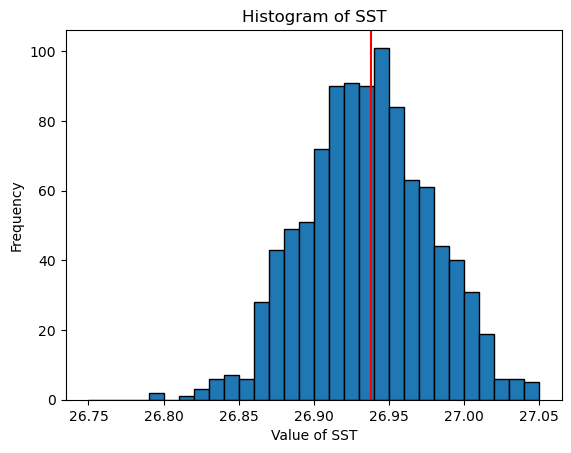

In [117]:
import matplotlib.pyplot as plt
mean_total = np.mean(areal_mean)
max = np.nanmax(num_data)                              # FINDING THE MAXIMUM VALUE OF MEAN VALUE
bin_edges = np.arange(26.75,max,0.01)                  # DEFINING THE BIN EDGES 
plt.hist(num_data,bins = bin_edges,edgecolor='Black')
plt.axvline(mean_total,color='red')
plt.title('Histogram of SST')
plt.xlabel('Value of SST')
plt.ylabel('Frequency')
plt.show()

In [118]:
from scipy.stats import norm
#For calculating deviation

devi = np.std(areal_mean)
a1 = devi.values
print("The standard deviation for the sample is",a1)

#For calculating Sample mean
samp_mean = np.mean(num_data)
print("The mean of the sample is",samp_mean)

#For z-value for the 95% confidence interval
cf = 0.025
z_val = norm.ppf(cf)
print("The Z-value for 95 % confidence interval is",z_val)

# For calculating confidence intervals
lb = samp_mean-(-z_val*a1)/np.sqrt(1000)

ub = samp_mean+(-z_val*a1)/np.sqrt(1000)
print('The 95% confidence interval for the given sample is',{ lb , ub})

The standard deviation for the sample is 0.8956066966056824
The mean of the sample is 26.935919637680055
The Z-value for 95 % confidence interval is -1.9599639845400545
The 95% confidence interval for the given sample is {26.880410379534563, 26.991428895825546}


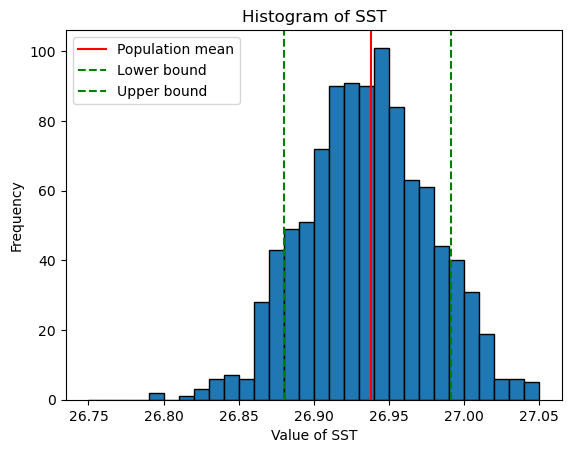

In [119]:
import matplotlib.pyplot as plt
mean_total = np.mean(areal_mean)
max = np.nanmax(num_data)                              # FINDING THE MAXIMUM VALUE OF MEAN VALUE
bin_edges = np.arange(26.75,max,0.01)                  # DEFINING THE BIN EDGES 
plt.hist(num_data,bins = bin_edges,edgecolor='Black')
plt.axvline(mean_total,color='red',label='Population mean')
plt.axvline(lb,color='green',label='Lower bound',linestyle='dashed')
plt.axvline(ub,color='green',label='Upper bound',linestyle='dashed')
plt.legend(loc='upper left')
plt.title('Histogram of SST')
plt.xlabel('Value of SST')
plt.ylabel('Frequency')
plt.show()

In [130]:
#For calculating the confidence interval using  T distribution
from scipy import stats
n = len(num_data)

#For calculating the sample standard deviation 
'''
num_data = np.zeros([a,1])         #Creating an array using np.zeros 
for i in range(a):
    rand_steps = np.random.choice(areal_mean,360,replace=False)             # PICKING UP RANDOM 360 NON REPEATING STEPS OUT OF TOTAL 1868 STEPS
    num_data[i] = np.std(rand_steps)                                       # STORING THESE VALUES INTO THE ALREADY CREATED EMPTY ARRAY
'''                     
sq_mean = (areal_mean - samp_mean)**2
mean_2 = np.sum(sq_mean)/(len(num_data)-1)
t_dev = np.sqrt(mean_2)
print('The value of the T value is',t_dev.values)
#For determining the t value
t_val = stats.t.ppf(1-cf,df=n-1)
print('The value of T for 95% confidence interval is',t_val)

#For determining the lower and upper bound 
ts=(t_val*t_dev)/np.sqrt(len(num_data))
lb2 = samp_mean-(t_val*t_dev)/np.sqrt(len(num_data))
ub2 = samp_mean+(t_val*t_dev)/np.sqrt(len(num_data))
print('The 95 % confidence interval using T distribution is',lb2.values,ub2.values)

The value of the T value is 1.22468440942307
The value of T for 95% confidence interval is 1.9623414611334487
The 95 % confidence interval using T distribution is 26.859922231643083 27.011917043717027


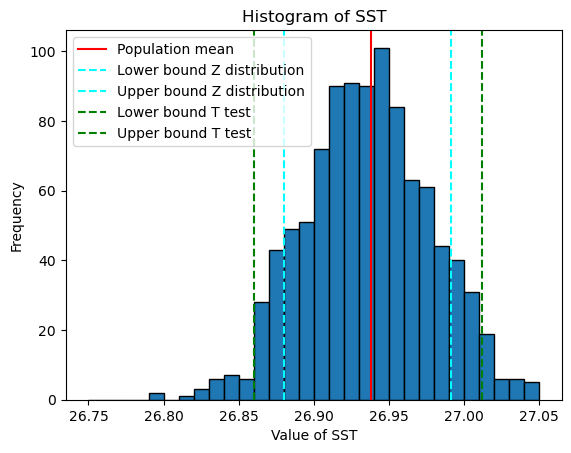

In [132]:
import matplotlib.pyplot as plt
mean_total = np.mean(areal_mean)
max = np.nanmax(num_data)                              # FINDING THE MAXIMUM VALUE OF MEAN VALUE
bin_edges = np.arange(26.75,max,0.01)                  # DEFINING THE BIN EDGES 
plt.hist(num_data,bin_edges,edgecolor='Black')
plt.axvline(mean_total,color='red',label='Population mean')
plt.axvline(lb,color='cyan',label='Lower bound Z distribution',linestyle='dashed')
plt.axvline(ub,color='cyan',label='Upper bound Z distribution',linestyle='dashed')
plt.axvline(lb2,color='green',label='Lower bound T test',linestyle='dashed')
plt.axvline(ub2,color='green',label='Upper bound T test',linestyle='dashed')
plt.legend(loc='upper left')
plt.title('Histogram of T distri')
plt.xlabel('Value of SST')
plt.ylabel('Frequency')
plt.show()

In [114]:
#for hypothesis testing 
#h0 = Null hypothesis where true mean is equal to or less than population mean
ts_h0 = (samp_mean-mean_total)/(devi.values/np.sqrt(len(num_data)))

if norm.cdf(ts_h0)<=norm.cdf(mean_total):
    print('The Hypothesis is accepted with test statistic',ts_h0.values)
else:
    print('The hypothesis is rejected')

The Hypothesis is accepted with test statistic -0.07277188869738553
